In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [2]:
data = pd.read_csv('cases-brazil-cities-time.csv')

In [3]:
data.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,SES
1,2020-02-25,Brazil,TOTAL,TOTAL,0,0,0,1,1,0.0,0.00048,0.0,NaN
2,2020-02-26,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,SES
3,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,0,1,0.0,0.00048,0.0,NaN
4,2020-02-27,Brazil,SP,São Paulo/SP,3550308,0,0,0,1,0.0,0.00816,0.0,SES


In [4]:
cities = ['Praia Grande/SP', 'Cubatão/SP', 'Santos/SP', 'São Vicente/SP', 'Guarujá/SP', 'Peruíbe/SP', 'Itanhaém/SP', 'Bertioga/SP', 'Mongaguá/SP']
index = data.city.isin(cities)

In [5]:
data_bs = data[index]

In [6]:
data_bs.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source
3030,2020-03-30,Brazil,SP,Santos/SP,3548500,0,0,1,1,0.0,0.23078,0.0,SES
3258,2020-03-31,Brazil,SP,Guarujá/SP,3518701,0,0,1,1,0.0,0.31205,0.0,SES
3443,2020-03-31,Brazil,SP,Santos/SP,3548500,0,0,13,14,0.0,3.23094,0.0,SES
3485,2020-03-31,Brazil,SP,São Vicente/SP,3551009,0,0,1,1,0.0,0.27337,0.0,SES
3703,2020-04-01,Brazil,SP,Guarujá/SP,3518701,0,0,0,1,0.0,0.31205,0.0,SES


In [7]:
data_bs.dtypes

date                                object
country                             object
state                               object
city                                object
ibgeID                               int64
newDeaths                            int64
deaths                               int64
newCases                             int64
totalCases                           int64
deaths_per_100k_inhabitants        float64
totalCases_per_100k_inhabitants    float64
deaths_by_totalCases               float64
_source                             object
dtype: object

In [8]:
data_bs['date'] = pd.to_datetime(data_bs['date'])

In [9]:
data_bs['Days'] = data_bs.apply(lambda x: x['date'] - data_bs[data_bs['city']==x['city']].date.min(), axis = 1)

In [10]:
data_bs.head()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,Days
3030,2020-03-30,Brazil,SP,Santos/SP,3548500,0,0,1,1,0.0,0.23078,0.0,SES,0 days
3258,2020-03-31,Brazil,SP,Guarujá/SP,3518701,0,0,1,1,0.0,0.31205,0.0,SES,0 days
3443,2020-03-31,Brazil,SP,Santos/SP,3548500,0,0,13,14,0.0,3.23094,0.0,SES,1 days
3485,2020-03-31,Brazil,SP,São Vicente/SP,3551009,0,0,1,1,0.0,0.27337,0.0,SES,0 days
3703,2020-04-01,Brazil,SP,Guarujá/SP,3518701,0,0,0,1,0.0,0.31205,0.0,SES,1 days


In [11]:
data_bs[data_bs['city']=='Cubatão/SP']

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,Days
9714,2020-04-10,Brazil,SP,Cubatão/SP,3513504,0,0,2,2,0.00000,1.53016,0.00000,SES,0 days
10647,2020-04-11,Brazil,SP,Cubatão/SP,3513504,0,0,0,2,0.00000,1.53016,0.00000,SES,1 days
11623,2020-04-12,Brazil,SP,Cubatão/SP,3513504,0,0,0,2,0.00000,1.53016,0.00000,SES,2 days
12647,2020-04-13,Brazil,SP,Cubatão/SP,3513504,0,0,0,2,0.00000,1.53016,0.00000,SES,3 days
13710,2020-04-14,Brazil,SP,Cubatão/SP,3513504,0,0,1,3,0.00000,2.29525,0.00000,SES,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162160,2020-06-05,Brazil,SP,Cubatão/SP,3513504,1,47,70,579,35.95884,442.98229,0.08117,SES,56 days
166660,2020-06-06,Brazil,SP,Cubatão/SP,3513504,0,47,0,579,35.95884,442.98229,0.08117,SES,57 days
171185,2020-06-07,Brazil,SP,Cubatão/SP,3513504,0,47,152,731,35.95884,559.27470,0.06430,SES,58 days
175751,2020-06-08,Brazil,SP,Cubatão/SP,3513504,0,47,2,733,35.95884,560.80487,0.06412,SES,59 days


In [12]:
data_bs.dtypes

date                                datetime64[ns]
country                                     object
state                                       object
city                                        object
ibgeID                                       int64
newDeaths                                    int64
deaths                                       int64
newCases                                     int64
totalCases                                   int64
deaths_per_100k_inhabitants                float64
totalCases_per_100k_inhabitants            float64
deaths_by_totalCases                       float64
_source                                     object
Days                               timedelta64[ns]
dtype: object

In [13]:
data_bs['Days'] = data_bs['Days'].dt.days

In [14]:
data_bs['city'] = data_bs['city'].str.replace('/SP','')

In [15]:
data_bs.tail()

,date,country,state,city,ibgeID,newDeaths,deaths,newCases,totalCases,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,_source,Days
181678,2020-06-09,Brazil,SP,Mongaguá,3531100,0,4,0,88,7.05442,155.19735,0.04545,SES,56
182184,2020-06-09,Brazil,SP,Peruíbe,3537602,0,9,0,85,13.18025,124.48011,0.10588,SES,63
182389,2020-06-09,Brazil,SP,Praia Grande,3541000,0,63,0,1396,19.38026,429.44200,0.04513,SES,69
182852,2020-06-09,Brazil,SP,Santos,3548500,0,189,0,4568,43.61763,1054.20818,0.04137,SES,71
183270,2020-06-09,Brazil,SP,São Vicente,3551009,0,91,0,1352,24.87712,369.60290,0.06731,SES,70


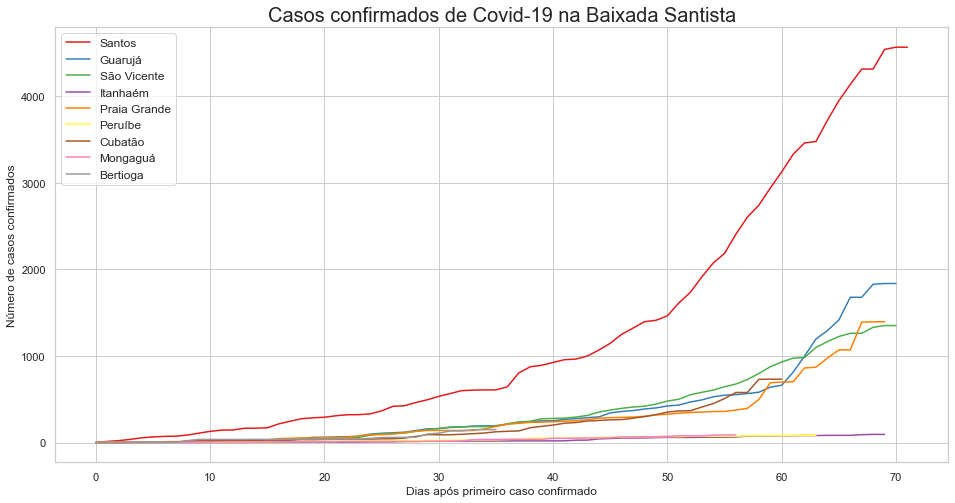

In [16]:
plt.figure(figsize = (16,8))
sns.set(style="whitegrid")
g = sns.lineplot(data = data_bs, x = 'Days', y = 'totalCases', hue = 'city', palette="Set1")
g.axes.set_title("Casos confirmados de Covid-19 na Baixada Santista",fontsize=20)
g.set_xlabel("Dias após primeiro caso confirmado")
g.set_ylabel("Número de casos confirmados")
g.legend(data_bs['city'].unique(), fontsize=12)

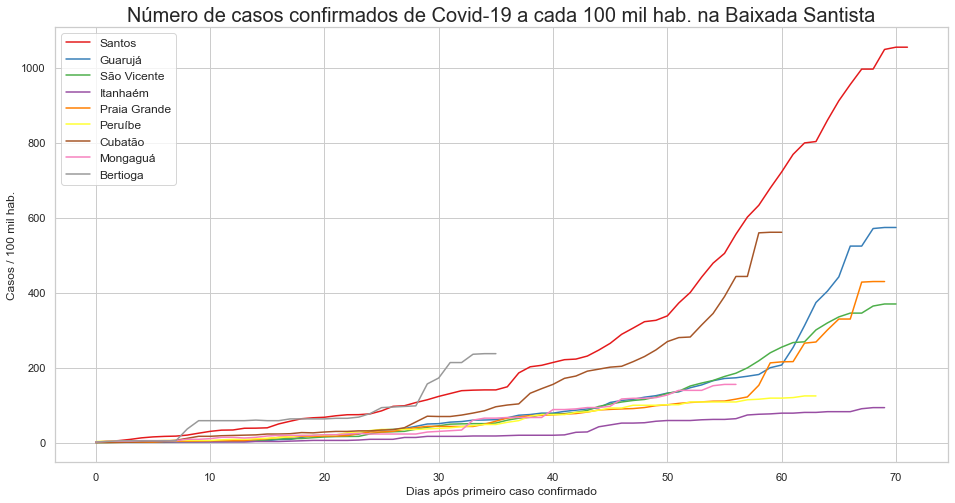

In [17]:
plt.figure(figsize = (16,8))
sns.set(style="whitegrid")
g = sns.lineplot(data = data_bs, x = 'Days', y = 'totalCases_per_100k_inhabitants', hue = 'city', palette="Set1")
g.axes.set_title("Número de casos confirmados de Covid-19 a cada 100 mil hab. na Baixada Santista",fontsize=20)
g.set_xlabel("Dias após primeiro caso confirmado")
g.set_ylabel("Casos / 100 mil hab.")
g.legend(data_bs['city'].unique(), fontsize=12)

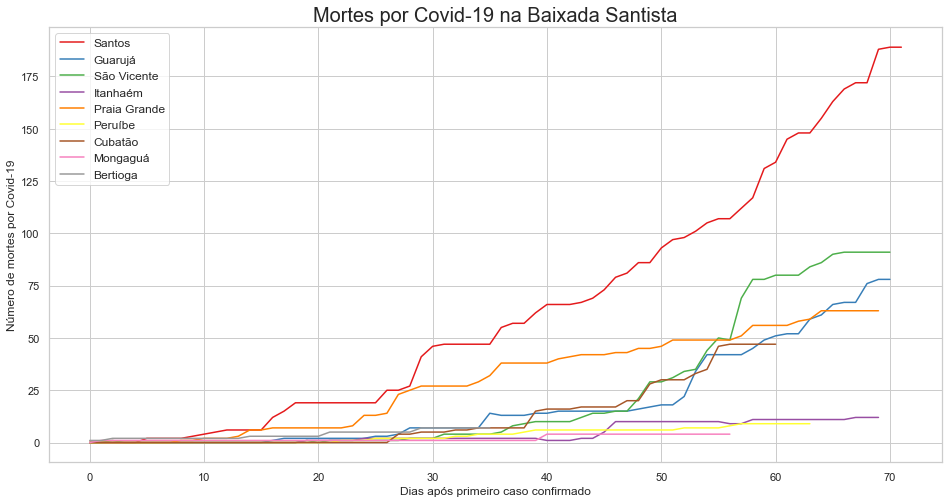

In [18]:
plt.figure(figsize = (16,8))
sns.set(style="whitegrid")
g = sns.lineplot(data = data_bs, x = 'Days', y = 'deaths', hue = 'city', palette="Set1")
g.axes.set_title("Mortes por Covid-19 na Baixada Santista",fontsize=20)
g.set_xlabel("Dias após primeiro caso confirmado")
g.set_ylabel("Número de mortes por Covid-19")
g.legend(data_bs['city'].unique(), fontsize=12)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Santos')

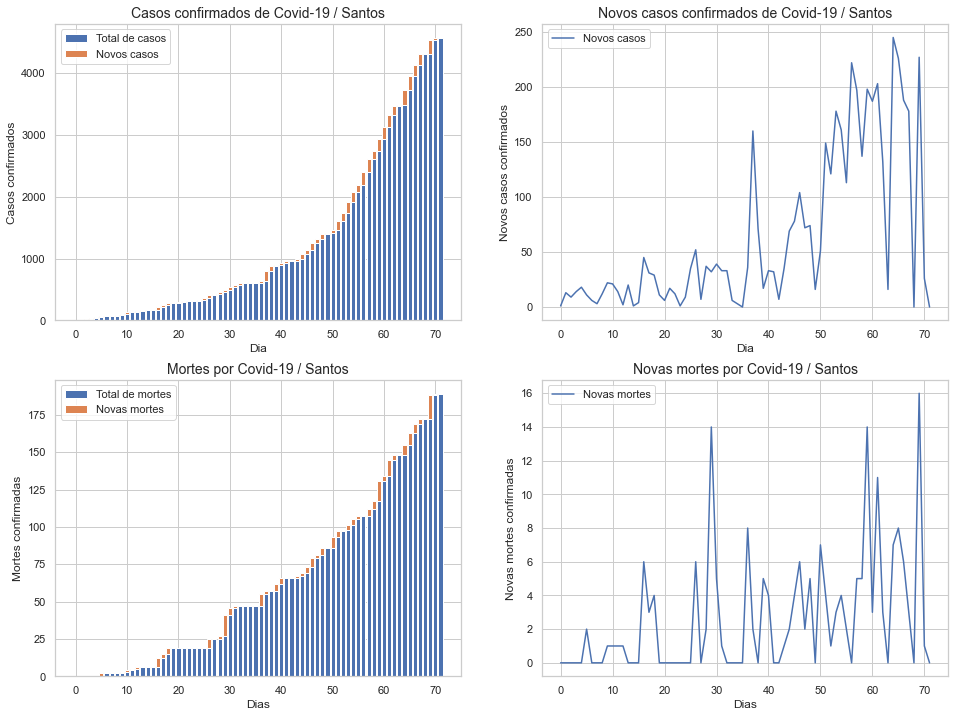

In [19]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Santos'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].totalCases - data_bs[data_bs['city']=='Santos'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].newCases, bottom = data_bs[data_bs['city']=='Santos'].totalCases - data_bs[data_bs['city']=='Santos'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Santos', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Santos', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Santos'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].deaths - data_bs[data_bs['city']=='Santos'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].newDeaths, bottom = data_bs[data_bs['city']=='Santos'].deaths - data_bs[data_bs['city']=='Santos'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Santos', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Santos'].Days, data_bs[data_bs['city']=='Santos'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Santos', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Cubatão')

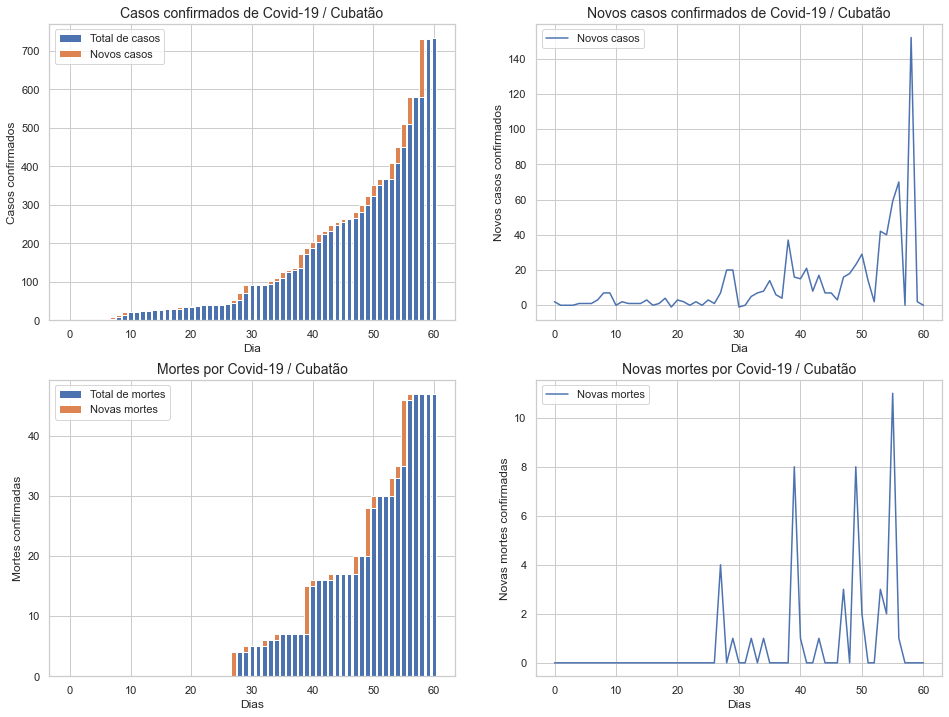

In [20]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Cubatão'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].totalCases - data_bs[data_bs['city']=='Cubatão'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].newCases, bottom = data_bs[data_bs['city']=='Cubatão'].totalCases - data_bs[data_bs['city']=='Cubatão'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Cubatão', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Cubatão', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Cubatão'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].deaths - data_bs[data_bs['city']=='Cubatão'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].newDeaths, bottom = data_bs[data_bs['city']=='Cubatão'].deaths - data_bs[data_bs['city']=='Cubatão'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Cubatão', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Cubatão'].Days, data_bs[data_bs['city']=='Cubatão'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Cubatão', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Praia Grande')

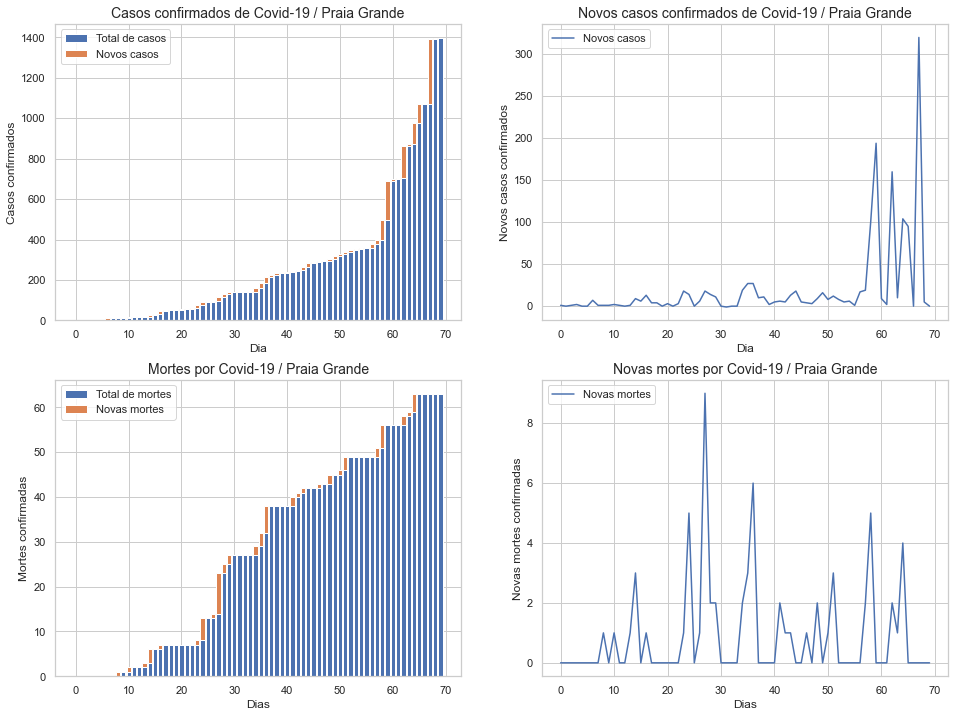

In [21]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Praia Grande'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].totalCases - data_bs[data_bs['city']=='Praia Grande'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].newCases, bottom = data_bs[data_bs['city']=='Praia Grande'].totalCases - data_bs[data_bs['city']=='Praia Grande'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Praia Grande', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Praia Grande', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Praia Grande'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].deaths - data_bs[data_bs['city']=='Praia Grande'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].newDeaths, bottom = data_bs[data_bs['city']=='Praia Grande'].deaths - data_bs[data_bs['city']=='Praia Grande'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Praia Grande', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Praia Grande'].Days, data_bs[data_bs['city']=='Praia Grande'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Praia Grande', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / São Vicente')

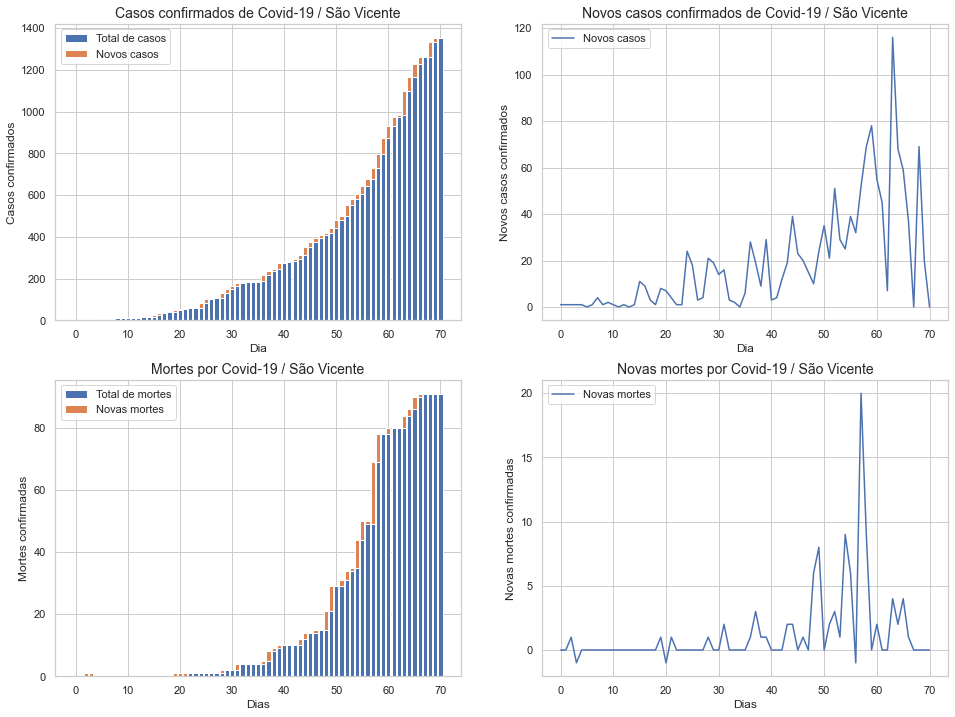

In [22]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='São Vicente'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].totalCases - data_bs[data_bs['city']=='São Vicente'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].newCases, bottom = data_bs[data_bs['city']=='São Vicente'].totalCases - data_bs[data_bs['city']=='São Vicente'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / São Vicente', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / São Vicente', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='São Vicente'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].deaths - data_bs[data_bs['city']=='São Vicente'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].newDeaths, bottom = data_bs[data_bs['city']=='São Vicente'].deaths - data_bs[data_bs['city']=='São Vicente'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / São Vicente', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='São Vicente'].Days, data_bs[data_bs['city']=='São Vicente'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / São Vicente', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Guarujá')

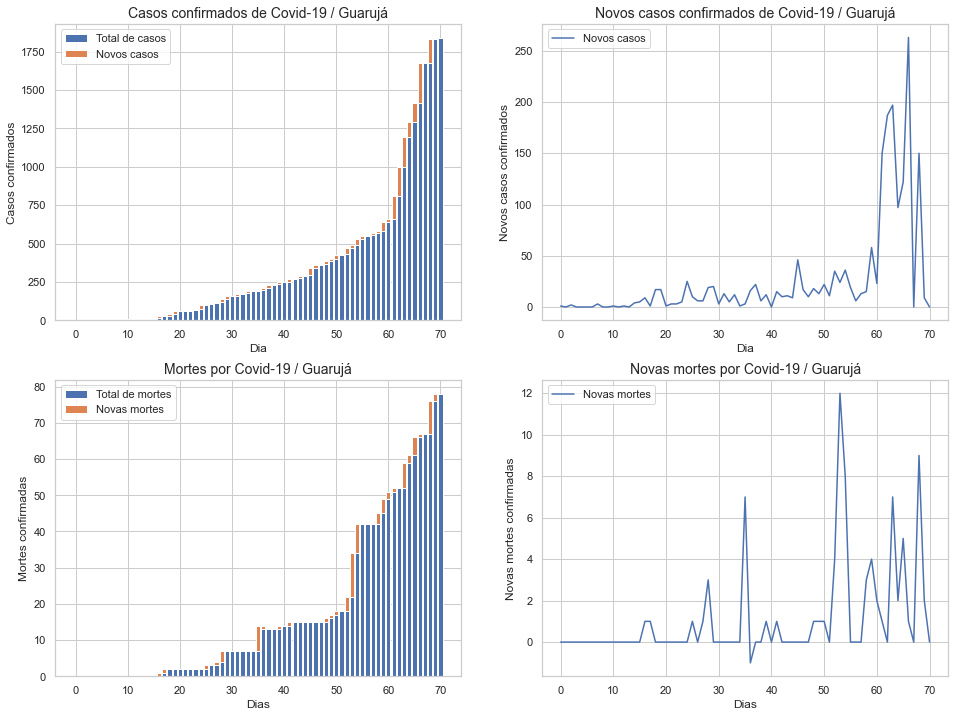

In [23]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Guarujá'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].totalCases - data_bs[data_bs['city']=='Guarujá'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].newCases, bottom = data_bs[data_bs['city']=='Guarujá'].totalCases - data_bs[data_bs['city']=='Guarujá'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Guarujá', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Guarujá', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Guarujá'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].deaths - data_bs[data_bs['city']=='Guarujá'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].newDeaths, bottom = data_bs[data_bs['city']=='Guarujá'].deaths - data_bs[data_bs['city']=='Guarujá'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Guarujá', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Guarujá'].Days, data_bs[data_bs['city']=='Guarujá'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Guarujá', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Itanhaém')

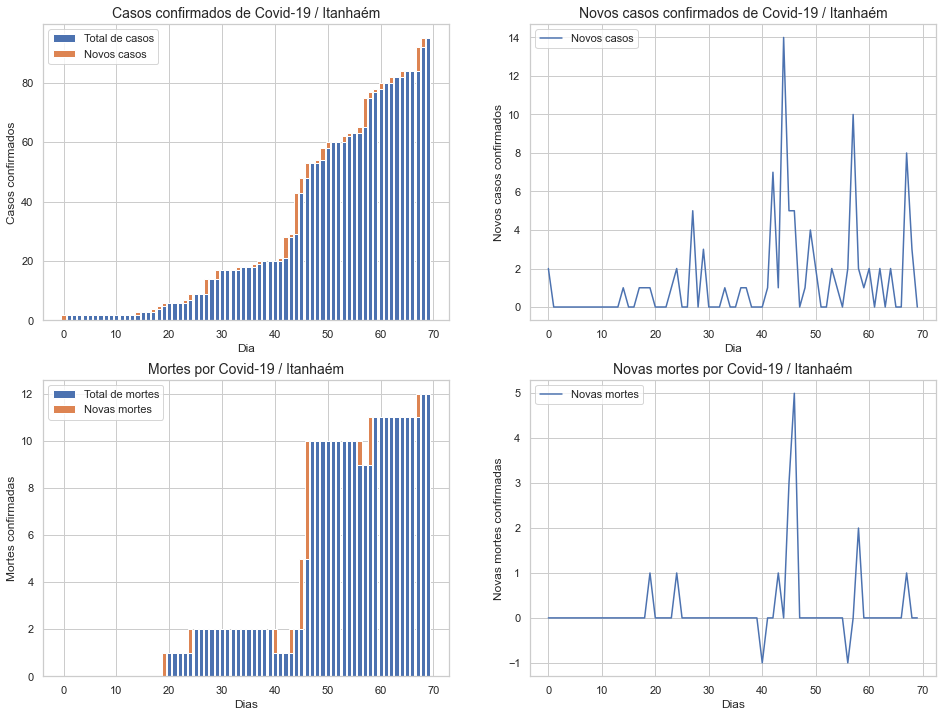

In [24]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Itanhaém'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].totalCases - data_bs[data_bs['city']=='Itanhaém'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].newCases, bottom = data_bs[data_bs['city']=='Itanhaém'].totalCases - data_bs[data_bs['city']=='Itanhaém'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Itanhaém', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Itanhaém', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Itanhaém'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].deaths - data_bs[data_bs['city']=='Itanhaém'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].newDeaths, bottom = data_bs[data_bs['city']=='Itanhaém'].deaths - data_bs[data_bs['city']=='Itanhaém'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Itanhaém', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Itanhaém'].Days, data_bs[data_bs['city']=='Itanhaém'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Itanhaém', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Mongaguá')

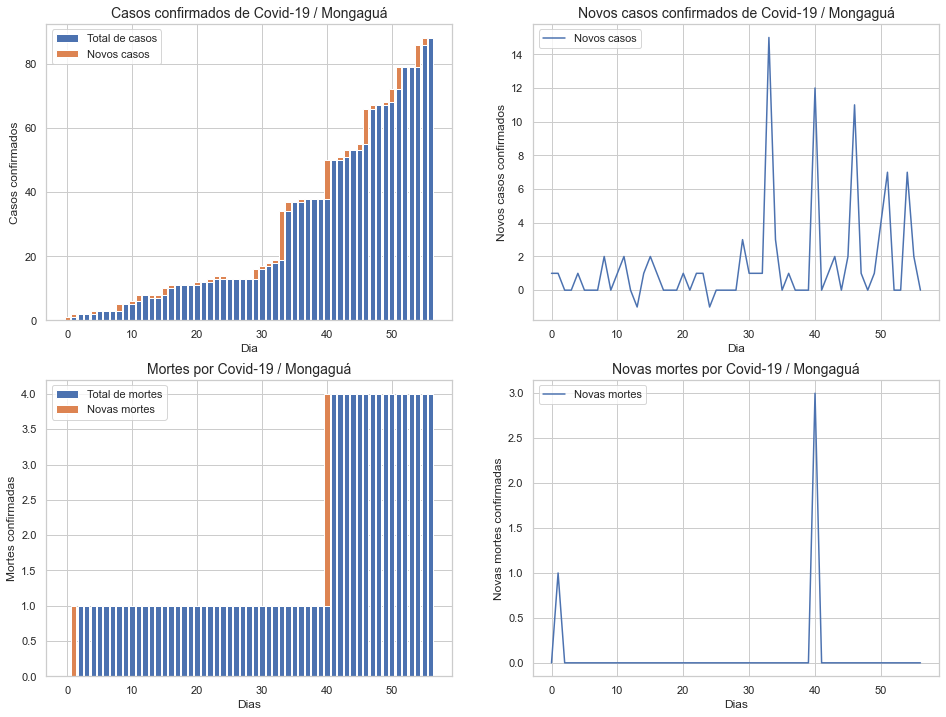

In [25]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Mongaguá'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].totalCases - data_bs[data_bs['city']=='Mongaguá'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].newCases, bottom = data_bs[data_bs['city']=='Mongaguá'].totalCases - data_bs[data_bs['city']=='Mongaguá'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Mongaguá', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Mongaguá', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Mongaguá'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].deaths - data_bs[data_bs['city']=='Mongaguá'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].newDeaths, bottom = data_bs[data_bs['city']=='Mongaguá'].deaths - data_bs[data_bs['city']=='Mongaguá'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Mongaguá', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Mongaguá'].Days, data_bs[data_bs['city']=='Mongaguá'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Mongaguá', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Bertioga')

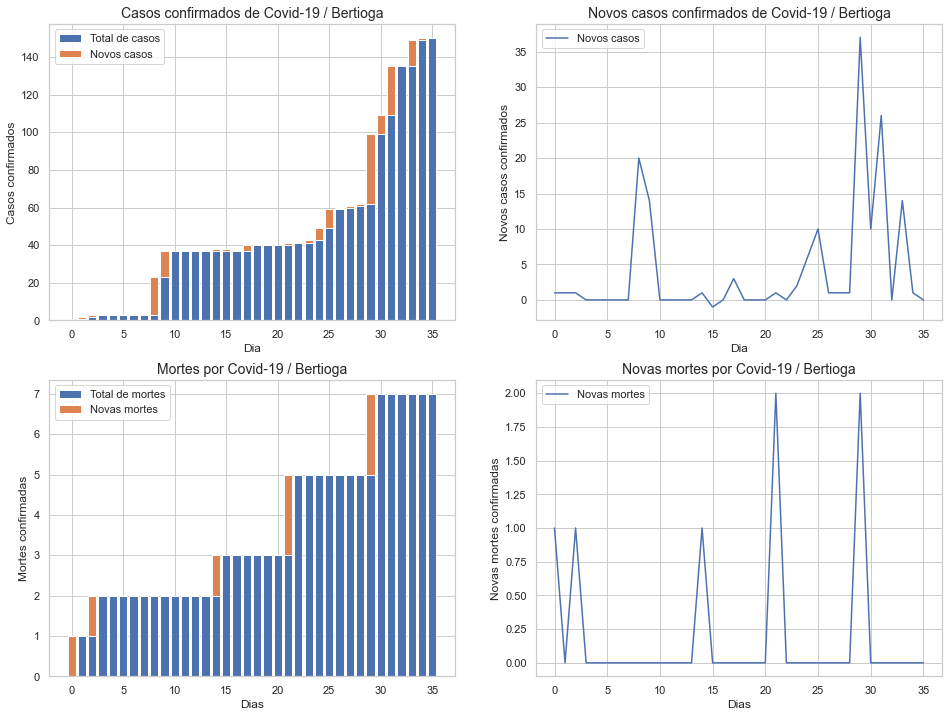

In [26]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Bertioga'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].totalCases - data_bs[data_bs['city']=='Bertioga'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].newCases, bottom = data_bs[data_bs['city']=='Bertioga'].totalCases - data_bs[data_bs['city']=='Bertioga'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Bertioga', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Bertioga', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Bertioga'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].deaths - data_bs[data_bs['city']=='Bertioga'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].newDeaths, bottom = data_bs[data_bs['city']=='Bertioga'].deaths - data_bs[data_bs['city']=='Bertioga'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Bertioga', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Bertioga'].Days, data_bs[data_bs['city']=='Bertioga'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Bertioga', fontsize = 14)

Text(0.5, 1.0, 'Novas mortes por Covid-19 / Peruíbe')

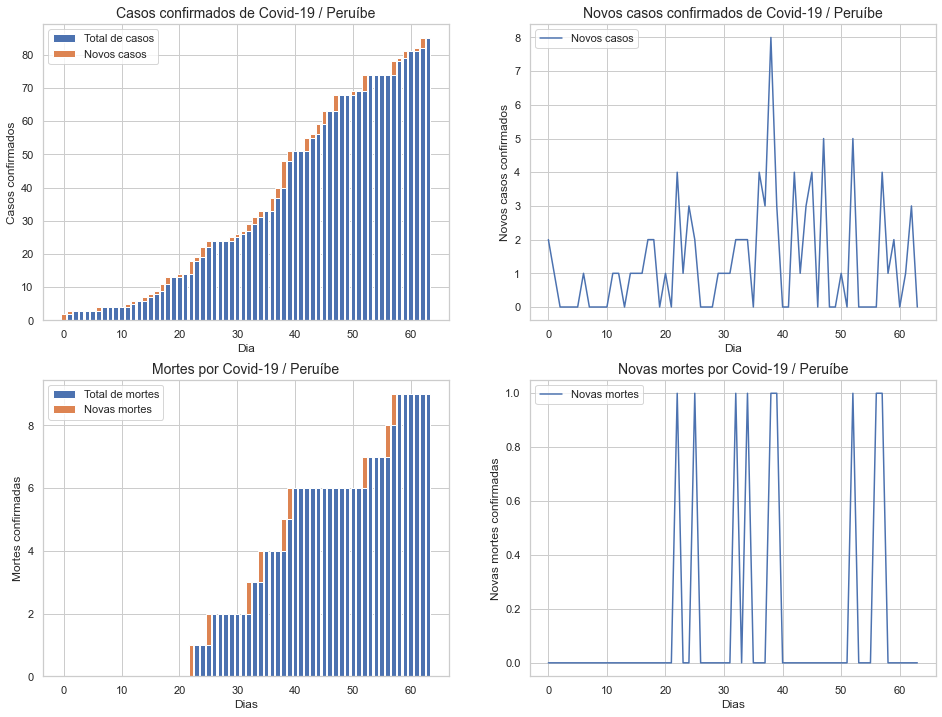

In [27]:
fig, ax = plt.subplots(2, 2, figsize =(16, 12))
ax[0,0].set_ylim([0, data_bs[data_bs['city']=='Peruíbe'].totalCases.max() * 1.05])
ax[0,0].bar(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].totalCases - data_bs[data_bs['city']=='Peruíbe'].newCases, label = 'Total de casos') 
ax[0,0].bar(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].newCases, bottom = data_bs[data_bs['city']=='Peruíbe'].totalCases - data_bs[data_bs['city']=='Peruíbe'].newCases, label = 'Novos casos') 
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Casos confirmados')
ax[0,0].set_xlabel('Dia')
ax[0,0].set_title('Casos confirmados de Covid-19 / Peruíbe', fontsize = 14)

ax[0,1].plot(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].newCases, label = 'Novos casos') 
ax[0,1].legend(loc='upper left')
ax[0,1].set_ylabel('Novos casos confirmados')
ax[0,1].set_xlabel('Dia')
ax[0,1].set_title('Novos casos confirmados de Covid-19 / Peruíbe', fontsize = 14)

ax[1,0].set_ylim([0, data_bs[data_bs['city']=='Peruíbe'].deaths.max() * 1.05])
ax[1,0].bar(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].deaths - data_bs[data_bs['city']=='Peruíbe'].newDeaths, label = 'Total de mortes') 
ax[1,0].bar(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].newDeaths, bottom = data_bs[data_bs['city']=='Peruíbe'].deaths - data_bs[data_bs['city']=='Peruíbe'].newDeaths, label = 'Novas mortes') 
ax[1,0].legend(loc='upper left')
ax[1,0].set_ylabel('Mortes confirmadas')
ax[1,0].set_xlabel('Dias')
ax[1,0].set_title('Mortes por Covid-19 / Peruíbe', fontsize = 14)

ax[1,1].plot(data_bs[data_bs['city']=='Peruíbe'].Days, data_bs[data_bs['city']=='Peruíbe'].newDeaths, label = 'Novas mortes') 
ax[1,1].legend(loc='upper left')
ax[1,1].set_ylabel('Novas mortes confirmadas')
ax[1,1].set_xlabel('Dias')
ax[1,1].set_title('Novas mortes por Covid-19 / Peruíbe', fontsize = 14)